In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os   
import sys
from sklearn.linear_model import LinearRegression
import datetime

In [398]:
path1 = 'D:\Python\cab_rides.csv'
path2 = 'D:\Python\weather.csv'
data1 = pd.read_csv(path1)
data2 = pd.read_csv(path2)

In [399]:
data1

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [400]:
data2

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [401]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [402]:
cab_data = reduce_mem_usage(data1)
weather_data = reduce_mem_usage(data2)

Memory usage of dataframe is 52.88 MB
Memory usage after optimization is: 36.62 MB
Decreased by 30.8%
Memory usage of dataframe is 0.38 MB
Memory usage after optimization is: 0.10 MB
Decreased by 73.3%


In [403]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [404]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.40625,Back Bay,1.0,1012.0,0.122803,1545003901,0.770020,11.250000
1,42.43750,Beacon Hill,1.0,1012.0,0.184570,1545003901,0.759766,11.320312
2,42.50000,Boston University,1.0,1012.0,0.108887,1545003901,0.759766,11.070312
3,42.12500,Fenway,1.0,1012.0,0.096924,1545003901,0.770020,11.093750
4,43.12500,Financial District,1.0,1012.0,0.178589,1545003901,0.750000,11.492188


In [405]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [406]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [407]:
cab_data['datetime'] = pd.to_datetime(cab_data['time_stamp'])
# it .to_datetime() function convert object to datetime64[ns] dtype
weather_data['date_time'] = pd.to_datetime(weather_data['time_stamp'])

In [408]:
cab_data.shape

(693071, 11)

In [409]:
weather_data.shape

(6276, 9)

In [410]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier,datetime
count,693071.000000,6.930710e+05,637976.0,693071.0,693071
mean,NaN,1.544046e+12,NaN,NaN,1970-01-01 00:25:44.045709764
min,0.020004,1.543204e+12,2.5,1.0,1970-01-01 00:25:43.203646318
25%,1.280273,1.543444e+12,9.0,1.0,1970-01-01 00:25:43.443968356
50%,2.160156,1.543737e+12,13.5,1.0,1970-01-01 00:25:43.737477529
75%,2.919922,1.544828e+12,22.5,1.0,1970-01-01 00:25:44.827508976
max,7.859375,1.545161e+12,97.5,3.0,1970-01-01 00:25:45.160510943
std,0.000000,6.891925e+08,0.0,0.0,NaN


In [411]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind,date_time
count,6276.000000,6276.000000,6276.000,894.000000,6.276000e+03,6276.000000,6276.000000,6276
mean,inf,0.677734,inf,0.057648,1.543857e+09,0.764160,6.800781,1970-01-01 00:00:01.543857377
min,19.625000,0.000000,988.000,0.000200,1.543204e+09,0.449951,0.290039,1970-01-01 00:00:01.543203644
25%,36.085938,0.439941,997.875,0.004902,1.543387e+09,0.669922,3.517090,1970-01-01 00:00:01.543386870
50%,40.125000,0.779785,1007.500,0.014847,1.543514e+09,0.759766,6.570312,1970-01-01 00:00:01.543513974
75%,42.843750,0.970215,1018.500,0.060913,1.544691e+09,0.890137,9.921875,1970-01-01 00:00:01.544690701
max,55.406250,1.000000,1035.000,0.780762,1.545159e+09,0.990234,18.187500,1970-01-01 00:00:01.545158702
std,6.019531,0.314209,12.875,0.100769,6.659340e+05,0.127319,3.632812,NaN


In [412]:
a = pd.concat([cab_data, weather_data])
# it concatinate the two dataframes

In [413]:
a.shape

(699347, 19)

In [414]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [415]:
a['day'] = a.date_time.dt.day
a['hour'] = a.date_time.dt.hour
# it .dt.day and .dt.hour function extract the day and hour from the date_time column

In [416]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
6271,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.71875,North Station,0.890137,1000.5,NaN,0.959961,1.519531,1970-01-01 00:00:01.543819974,1.0,0.0
6272,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.84375,Northeastern University,0.879883,1000.5,NaN,0.959961,1.540039,1970-01-01 00:00:01.543819974,1.0,0.0
6273,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.81250,South Station,0.890137,1000.5,NaN,0.959961,1.540039,1970-01-01 00:00:01.543819974,1.0,0.0
6274,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.78125,Theatre District,0.890137,1000.5,NaN,0.959961,1.540039,1970-01-01 00:00:01.543819974,1.0,0.0
6275,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.68750,West End,0.890137,1000.5,NaN,0.959961,1.519531,1970-01-01 00:00:01.543819974,1.0,0.0


In [417]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [418]:
# a.fillna(0, inplace=True)
# a.dropna(axis=1, how='any', inplace=True)

In [419]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [420]:
# Step 1: Identify categorical columns
categorical_columns = a.select_dtypes(include=['category']).columns

# Step 2: Convert categorical columns to object data type
a[categorical_columns] = a[categorical_columns].astype('object')

# Step 3: Replace NaN values with 0
a.fillna(0, inplace=True)


In [421]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [422]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [423]:
a.groupby('cab_type').count()
# groupby() function is used to split the data into groups based on some criteria

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


<Axes: xlabel='cab_type'>

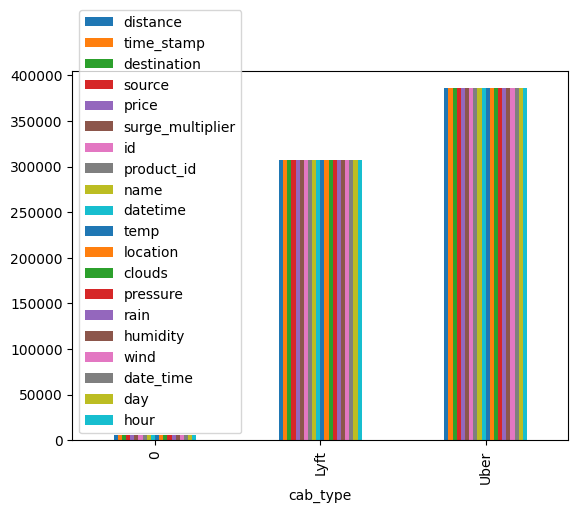

In [424]:
a.groupby('cab_type').count().plot.bar()

<Axes: xlabel='price'>

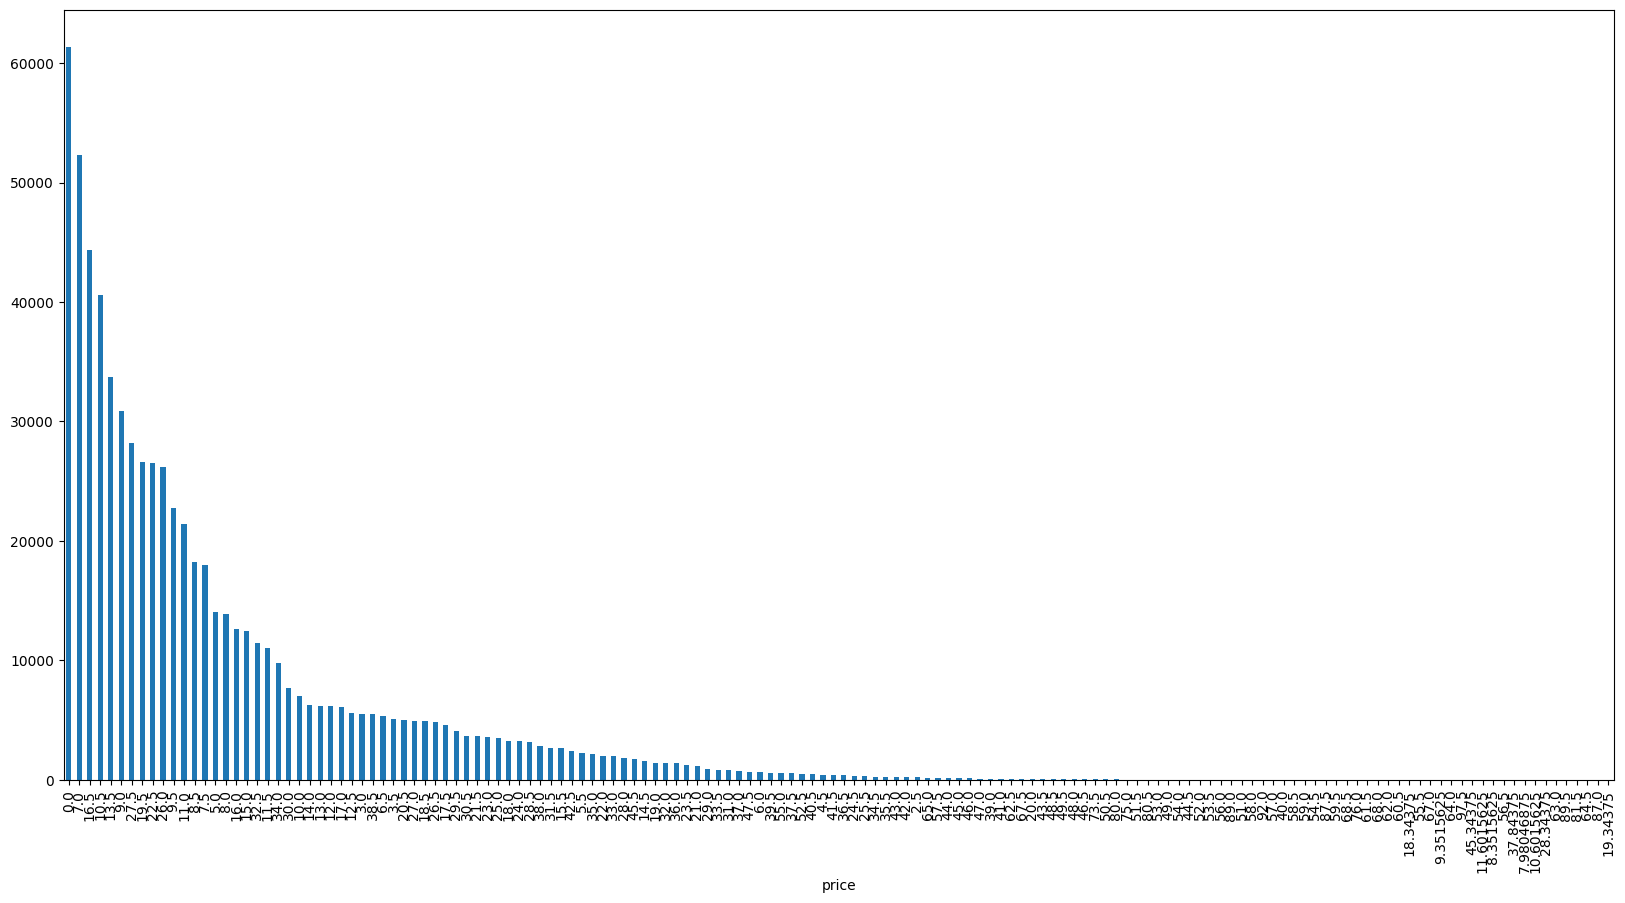

In [425]:
a['price'].value_counts().plot(kind='bar', figsize=(20,10))
# it .value_counts() function count the number of values in the column

<Axes: xlabel='hour'>

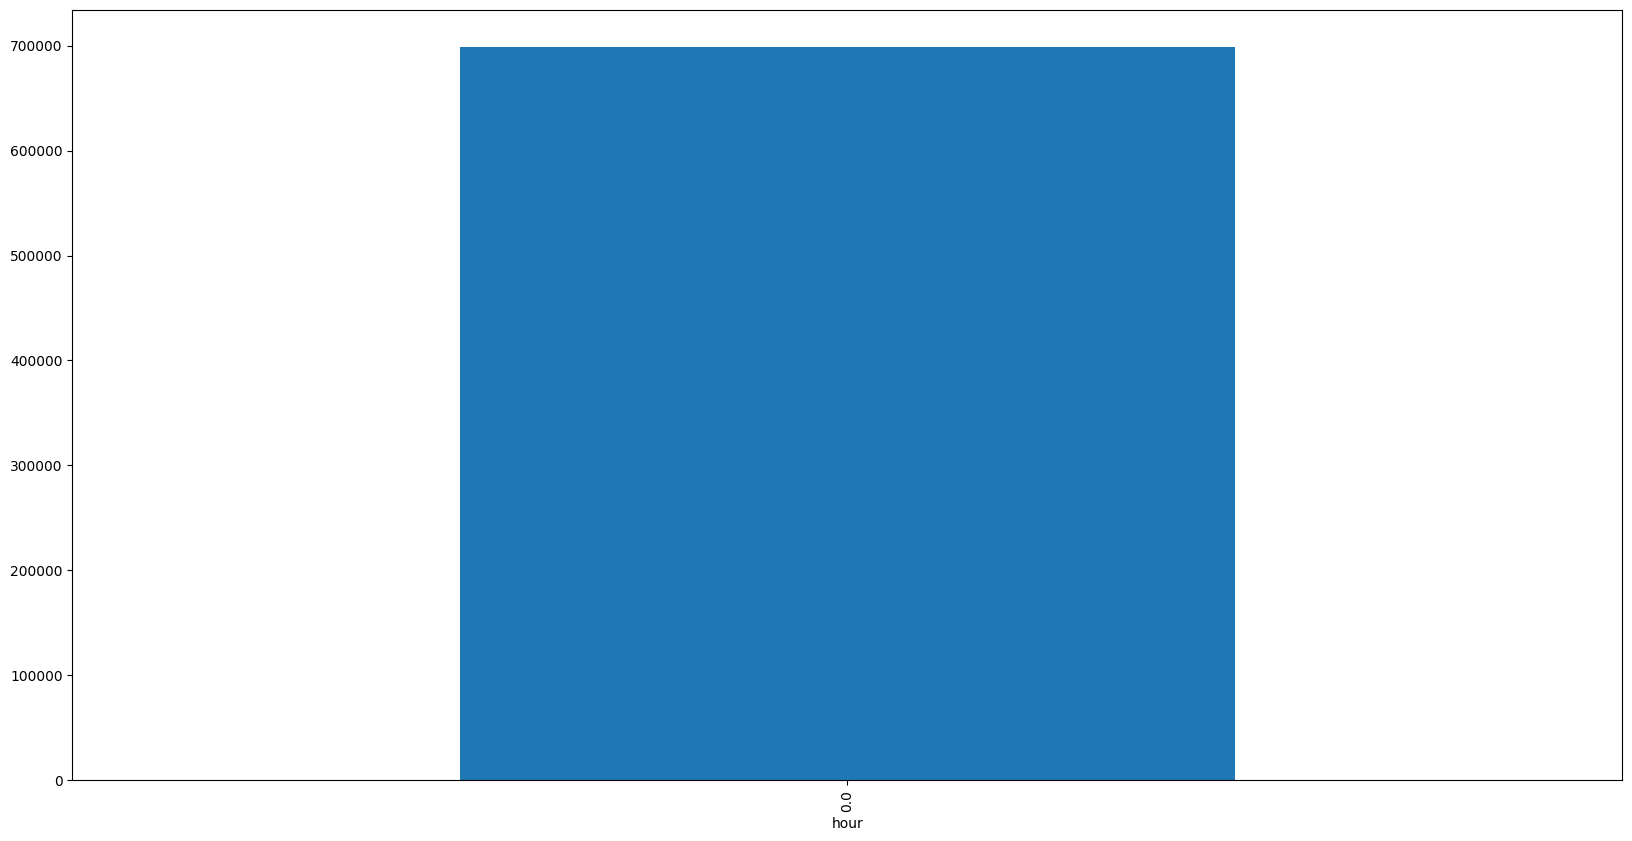

In [426]:
a['hour'].value_counts().plot(kind='bar', figsize=(20,10))

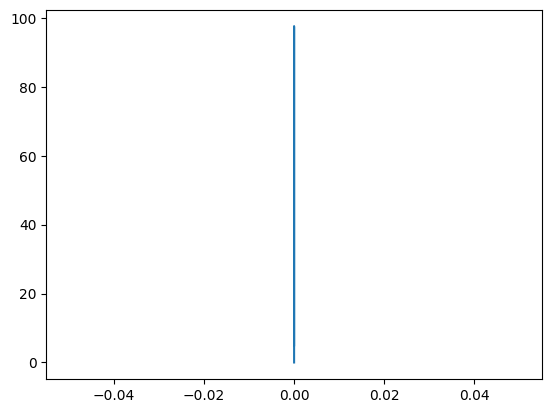

In [427]:
x=a['hour']
y=a['price']
plt.plot(x,y)
plt.show()

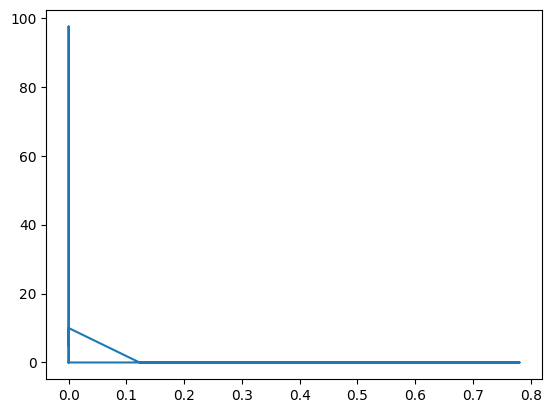

In [428]:
x=a['rain']
y=a['price']
plt.plot(x,y)
plt.show()

In [447]:
a

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0.00000,0,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0.0
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0.00000,0,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0.0
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,0.00000,0,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0.0
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,0.00000,0,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0.0
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,0.00000,0,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,0.000000,0,1543819974,0,0,0.0,0.0,0,0,0,...,44.71875,North Station,0.890137,1000.5,0.0,0.959961,1.519531,1970-01-01 00:00:01.543819974,1.0,0.0
6272,0.000000,0,1543819974,0,0,0.0,0.0,0,0,0,...,44.84375,Northeastern University,0.879883,1000.5,0.0,0.959961,1.540039,1970-01-01 00:00:01.543819974,1.0,0.0
6273,0.000000,0,1543819974,0,0,0.0,0.0,0,0,0,...,44.81250,South Station,0.890137,1000.5,0.0,0.959961,1.540039,1970-01-01 00:00:01.543819974,1.0,0.0
6274,0.000000,0,1543819974,0,0,0.0,0.0,0,0,0,...,44.78125,Theatre District,0.890137,1000.5,0.0,0.959961,1.540039,1970-01-01 00:00:01.543819974,1.0,0.0


In [456]:
x1 = a[['distance','surge_multiplier', 'temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day', 'hour']]
y1 = a['price']
from sklearn.model_selection import train_test_split
# it split the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=42)

In [457]:
x1.shape

(699347, 10)

In [458]:
y1.shape

(699347,)

In [459]:
linear = LinearRegression()


In [460]:
linear.fit(x_train,x_test)

ValueError: Found input variables with inconsistent numbers of samples: [524510, 174837]